# Project: Investigate a Dataset - [Medical Appointment No-show] dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions and Suggestions</a></li>
<li><a href="#limits">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

__[No-show appointments (original source on Kaggle)](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699#229356)__

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* PatientId - Identification of a patient
* AppointmentID - Identification of each appointment
* Gender - Male or Female
* ScheduledDay - the day the patient set up their appointment
* AppointmentDay - the day of actual appointment
* Age - how old is the patient
* Neighborhood - the location of the hospital.
* Scholarship - whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Hipertension - True or False
* Diabetes - True or False
* Alcoholism - True or False
* Handcap - the number of disabilities patient have
* SMS_received - True or False
* No-show - ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



### Questions for Analysis

1. What is the overall no-show rate for medical appointments in Brazil, and how does it vary by different patient characteristics such as gender, age, and enrollment in welfare program?

2. What is the relationship between receiving SMS reminders and the likelihood of showing up for a medical appointment?

3. How do different health conditions such as hypertension, diabetes, and alcoholism affect the likelihood of showing up for a medical appointment?

4. Are there any particular neighborhoods or regions in Brazil that have a higher or lower rate of no-shows for medical appointments?

5. Is there a relationship between wait times and appointment attendance?

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install pandas==1.4.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties


Load data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [3]:
df = pd.read_csv('medical_appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Before going to the analysis process, we need to do data cleaning of the following:

1. Change and fix columns name
2. Check for duplicates and null value
3. Change data types of "PatientId","ScheduledDay","AppointmentDay","No-show"
4. Variable "Age" show the min is -1 which is not logic so we need to remove these rows.


### Data Cleaning
 

#### 1. Change and Fix columns name

Change all the columns label into lowercase

In [7]:
df.columns = df.columns.str.lower()
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Because there's only 2 columns with underscore and '-', remove all 'underscore' and '-'

In [8]:
# remove underscore of sms_received
df = df.rename(columns={'sms_received': 'smsreceived'})

# remove '-' in no-show
df = df.rename(columns={'no-show': 'noshow'})

# confirm changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### 2. Check for duplicates and null value

Check for duplicates in appointmentid

In [9]:
sum(df['appointmentid'].duplicated())

0

Check to see if there's any null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  smsreceived     110527 non-null  int64  
 13  noshow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check number of unique values in each columns

In [11]:
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
smsreceived            2
noshow                 2
dtype: int64

We can see the  number of appointment is more than patient so we can keep this for now.

#### 3. Change data types of "PatientId","ScheduledDay","AppointmentDay","No-show"

Let's take a look at unqiue value of each variables to check the constanly in input. Then, change patientid into int

In [12]:
df['patientid'] = df['patientid'].astype(np.int64)

df.dtypes

patientid          int64
appointmentid      int64
gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
smsreceived        int64
noshow            object
dtype: object

First, check unqiue values of the column gender to make sure there's only 2 variables

In [13]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

For better observation, replace 'F' and 'M' as Female and Male

In [14]:
df['gender'] = df['gender'].replace({'F':'Female','M':'Male'})

# confirm changes
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

Check unique value of scheduledday and appointmentday

In [15]:
df['scheduledday'].unique

<bound method Series.unique of 0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: scheduledday, Length: 110527, dtype: object>

In [16]:
print(df['scheduledday'].unique)

<bound method Series.unique of 0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: scheduledday, Length: 110527, dtype: object>


Because these are ISO 8601 timestamp strings, we need to convert it into datetime object. 
If we need to perform any date or time calculations or comparisons later on, then it's often easier to work with datetime objects, only takes the date.

In [17]:
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.date.astype('datetime64[ns]')
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date.astype('datetime64[ns]')

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
0,29872499824296,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check the negative age 

In [18]:
df[df['age'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
99832,465943158731293,5775010,Female,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Change ['No' 'Yes'] to [0 1] in "noshow", we'll keep the "handcap" as it is because it has more than [0 1]

In [19]:
df['noshow'] = df['noshow'].replace({'No':0,'Yes':1})

# confirm change
df['noshow'].unique()

array([0, 1], dtype=int64)

#### 4. Variable "Age" show the min is -1 which is not logic so we need to remove these rows.

Drop the row with negative age

In [20]:
df = df.drop(df[df['age'] < 0].index)

# confirm changes
min(df['age'])

0

Check for unique value in "scholarship","hipertension","diabetes","alcoholism","sms-received"

In [21]:
for col in ['scholarship','hipertension','diabetes','alcoholism','smsreceived','handcap','noshow']:
    print(col, df[col].unique())

scholarship [0 1]
hipertension [1 0]
diabetes [0 1]
alcoholism [0 1]
smsreceived [0 1]
handcap [0 1 2 3 4]
noshow [0 1]


Final confirmation for all changes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110526 non-null  int64         
 1   appointmentid   110526 non-null  int64         
 2   gender          110526 non-null  object        
 3   scheduledday    110526 non-null  datetime64[ns]
 4   appointmentday  110526 non-null  datetime64[ns]
 5   age             110526 non-null  int64         
 6   neighbourhood   110526 non-null  object        
 7   scholarship     110526 non-null  int64         
 8   hipertension    110526 non-null  int64         
 9   diabetes        110526 non-null  int64         
 10  alcoholism      110526 non-null  int64         
 11  handcap         110526 non-null  int64         
 12  smsreceived     110526 non-null  int64         
 13  noshow          110526 non-null  int64         
dtypes: datetime64[ns](2), int64(10), obj

In [23]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Q1. What is the overall no-show rate for medical appointments in Brazil, and how does it vary by different patient characteristics such as gender, age, and enrollment in welfare program?

To answer this question, we can calculate the proportion of appointments that result in no-shows overall, as well as for different subgroups based on gender, age, and welfare program enrollment.

Calculate overall no-show rate. 

In [24]:
no_show_rate = df['noshow'].mean()

print(no_show_rate)


0.20193438647919945


Calculate no-show rates by gender

In [25]:
gender_no_show_rate = df.groupby('gender')['noshow'].mean()

print(gender_no_show_rate)

gender
Female    0.203149
Male      0.199679
Name: noshow, dtype: float64


Calculate the number of survey participants by gender

In [26]:
df['gender'].value_counts()

Female    71839
Male      38687
Name: gender, dtype: int64

Calculate no-show rates by age group

To calculate this, we need to create a new column 'agegroup' with age range and labels

In [27]:
age_bins = [0,18,35,50,65,120] # create bins and labels
age_labels = ['0-18','19-35','36-50','51-65','65+']

df['agegroup'] = pd.cut(df['age'], bins = age_bins, labels = age_labels) # create new column to df

age_no_show_rate = df.groupby('agegroup')['noshow'].mean() # calculate no-show rates by age group

print(age_no_show_rate)

agegroup
0-18     0.225372
19-35    0.238348
36-50    0.203258
51-65    0.165491
65+      0.155327
Name: noshow, dtype: float64


Calculate no-show rate by welfare scholarship enrollment

In [28]:
welfare_no_show_rate = df.groupby('scholarship')['noshow'].mean()

print(welfare_no_show_rate)

scholarship
0    0.198074
1    0.237363
Name: noshow, dtype: float64


Create function for plotting bar chart

In [29]:
def plot_bar_chart(xlabel, ylabel, title, w, h):
    fig = plt.gcf()
    fig.set_size_inches(w,h)  
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

Create bar chart of no-show rates by gender

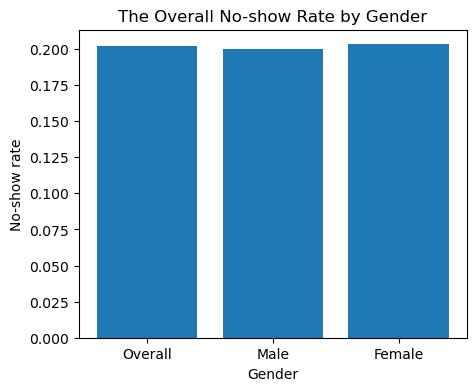

In [30]:
plt.bar(['Overall','Male','Female'], [no_show_rate, gender_no_show_rate['Male'], gender_no_show_rate['Female']])
plot_bar_chart('Gender','No-show rate','The Overall No-show Rate by Gender',5,4)

The overall no-show rate is 0.2019, which means that approximately 20% of patients did not show up for their appointments.

The gender-specific no-show rates show that 20.3% of female patients did not show up for their appointments, while 19.9% of male patients did not show up. 

Create bar chart of no-show rates by age group

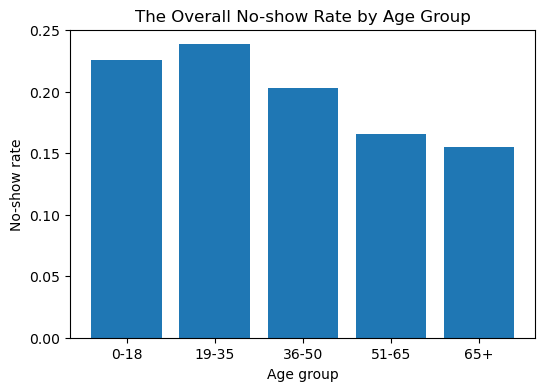

In [31]:
plt.bar(age_labels, age_no_show_rate)
plot_bar_chart('Age group','No-show rate','The Overall No-show Rate by Age Group',6,4)

The age group distribution of no-show rates suggests that patients in the 19-35 age group have the highest no-show rate (0.238), while patients in the 51-65 and 65+ age groups have the lowest no-show rates (0.165 and 0.155, respectively).

Compared to the overall no-show rate of 0.201, patients in the 19-35 age group are more likely to miss their appointments, while patients in the 51-65 and 65+ age groups are less likely to miss their appointments.


Create bar chart of no-show rates by welfare program

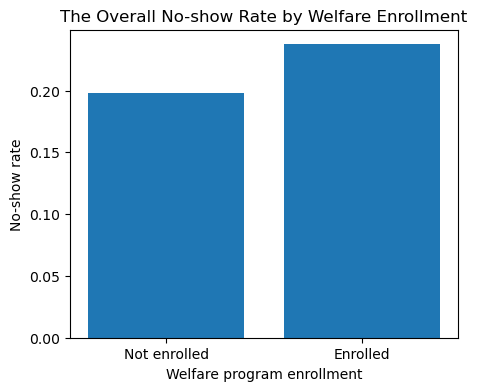

In [32]:
plt.bar(['Not enrolled', 'Enrolled'], [welfare_no_show_rate[0], welfare_no_show_rate[1]])
plot_bar_chart('Welfare program enrollment','No-show rate','The Overall No-show Rate by Welfare Enrollment',5,4)

Comparing these values to the overall no-show rate of 0.20193438647919945, we can see that patients who are enrolled in the Bolsa Família program have a higher no-show rate than the overall population, while patients who are not enrolled in the program have a lower no-show rate than the overall population.

### Q2. What is the relationship between receiving SMS reminders and the likelihood of showing up for a medical appointment?

To explore this question, we can calculate the proportion of appointments that resulted in a no-show for patients who received an SMS reminder versus those who did not.

Calculate no-show rates by receiving SMS reminders

In [33]:
sms_no_show_rate = df.groupby('smsreceived')['noshow'].mean()

print(sms_no_show_rate)

smsreceived
0    0.167035
1    0.275745
Name: noshow, dtype: float64


Create stacked bar chart to visualize reults

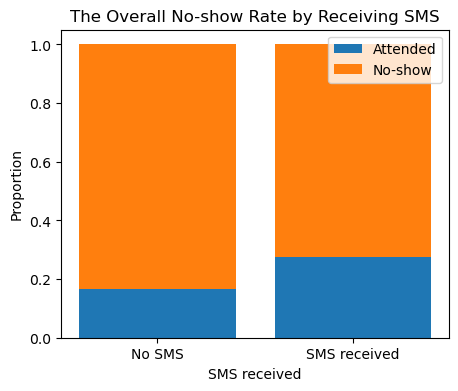

In [34]:
plt.figure(figsize=(5,4))
plt.bar(['No SMS', 'SMS received'], [sms_no_show_rate[0], sms_no_show_rate[1]], label='Attended')
plt.bar(['No SMS', 'SMS received'], [1 - sms_no_show_rate[0], 1 - sms_no_show_rate[1]], bottom=[sms_no_show_rate[0], sms_no_show_rate[1]], label='No-show')
plt.title('The Overall No-show Rate by Receiving SMS')
plt.xlabel('SMS received')
plt.ylabel('Proportion')
plt.legend()
plt.show()

Comparing these values to the overall no-show rate of 0.20193438647919945, we can see that patients who did not receive an SMS reminder have a lower no-show rate than the overall population, while patients who did receive an SMS reminder have a higher no-show rate than the overall population.

### Q3. How do different health conditions such as hypertension, diabetes, and alcoholism affect the likelihood of showing up for a medical appointment?
To answer this question, we can calculate the proportion of no-shows for patients with each of these health conditions, as well as for patients without any of these conditions.

Calculate no-show rates by health conditions.
First create filter of people who has health condition and who doesn't have health condition, then calculate the mean of these filters

In [35]:
conditions = ['hipertension','diabetes','alcoholism']

condition_no_show_rate = pd.Series([df[df[c] == 1]['noshow'].mean() for c in conditions], index=conditions) 
no_conditions_no_show_rate = df[df[conditions].sum(axis=1) == 0]['noshow'].mean()

print(condition_no_show_rate)
print(no_conditions_no_show_rate)

hipertension    0.173020
diabetes        0.180033
alcoholism      0.201488
dtype: float64
0.2090937862643739


Create grouped bar chart to visualize results

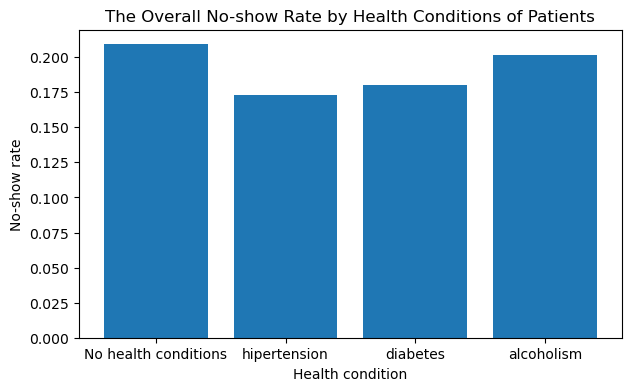

In [36]:
plt.bar(['No health conditions'] + conditions, [no_conditions_no_show_rate] + list(condition_no_show_rate))
plot_bar_chart('Health condition','No-show rate','The Overall No-show Rate by Health Conditions of Patients',7,4)

The no-show rate for patients who have hypertension is 17.30%, meaning 82.70% of patients with hypertension showed up for their appointments.

The no-show rate for patients who have diabetes is 18.00%, meaning 82.00% of patients with diabetes showed up for their appointments.

The no-show rate for patients who have alcoholism is 20.15%, meaning 79.85% of patients with alcoholism showed up for their appointments.

The no-show rate for patients who do not have any of the three conditions (i.e., patients with no hypertension, diabetes, or alcoholism) is 20.91%, meaning 79.09% of patients without any of these conditions showed up for their appointments.

### Q4. Are there any particular neighborhoods or regions in Brazil that have a higher or lower rate of no-shows for medical appointments?

To answer this question, we can calculate the no-show rate for each neighborhood or region in Brazil

In [37]:
# calculate no-show rate of each neighborhood
neighborhood_no_show_rate = df.groupby('neighbourhood')['noshow'].mean()

# then sort the neighborhoods by their no-show rate
neighborhood_no_show_rate = neighborhood_no_show_rate.sort_values(ascending=False)

print(neighborhood_no_show_rate)

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
                                 ...   
SOLON BORGES                   0.147122
MÁRIO CYPRESTE                 0.145553
AEROPORTO                      0.125000
ILHA DO BOI                    0.085714
PARQUE INDUSTRIAL              0.000000
Name: noshow, Length: 81, dtype: float64


Create a bar chart to show the no-show rate for each neighborhood

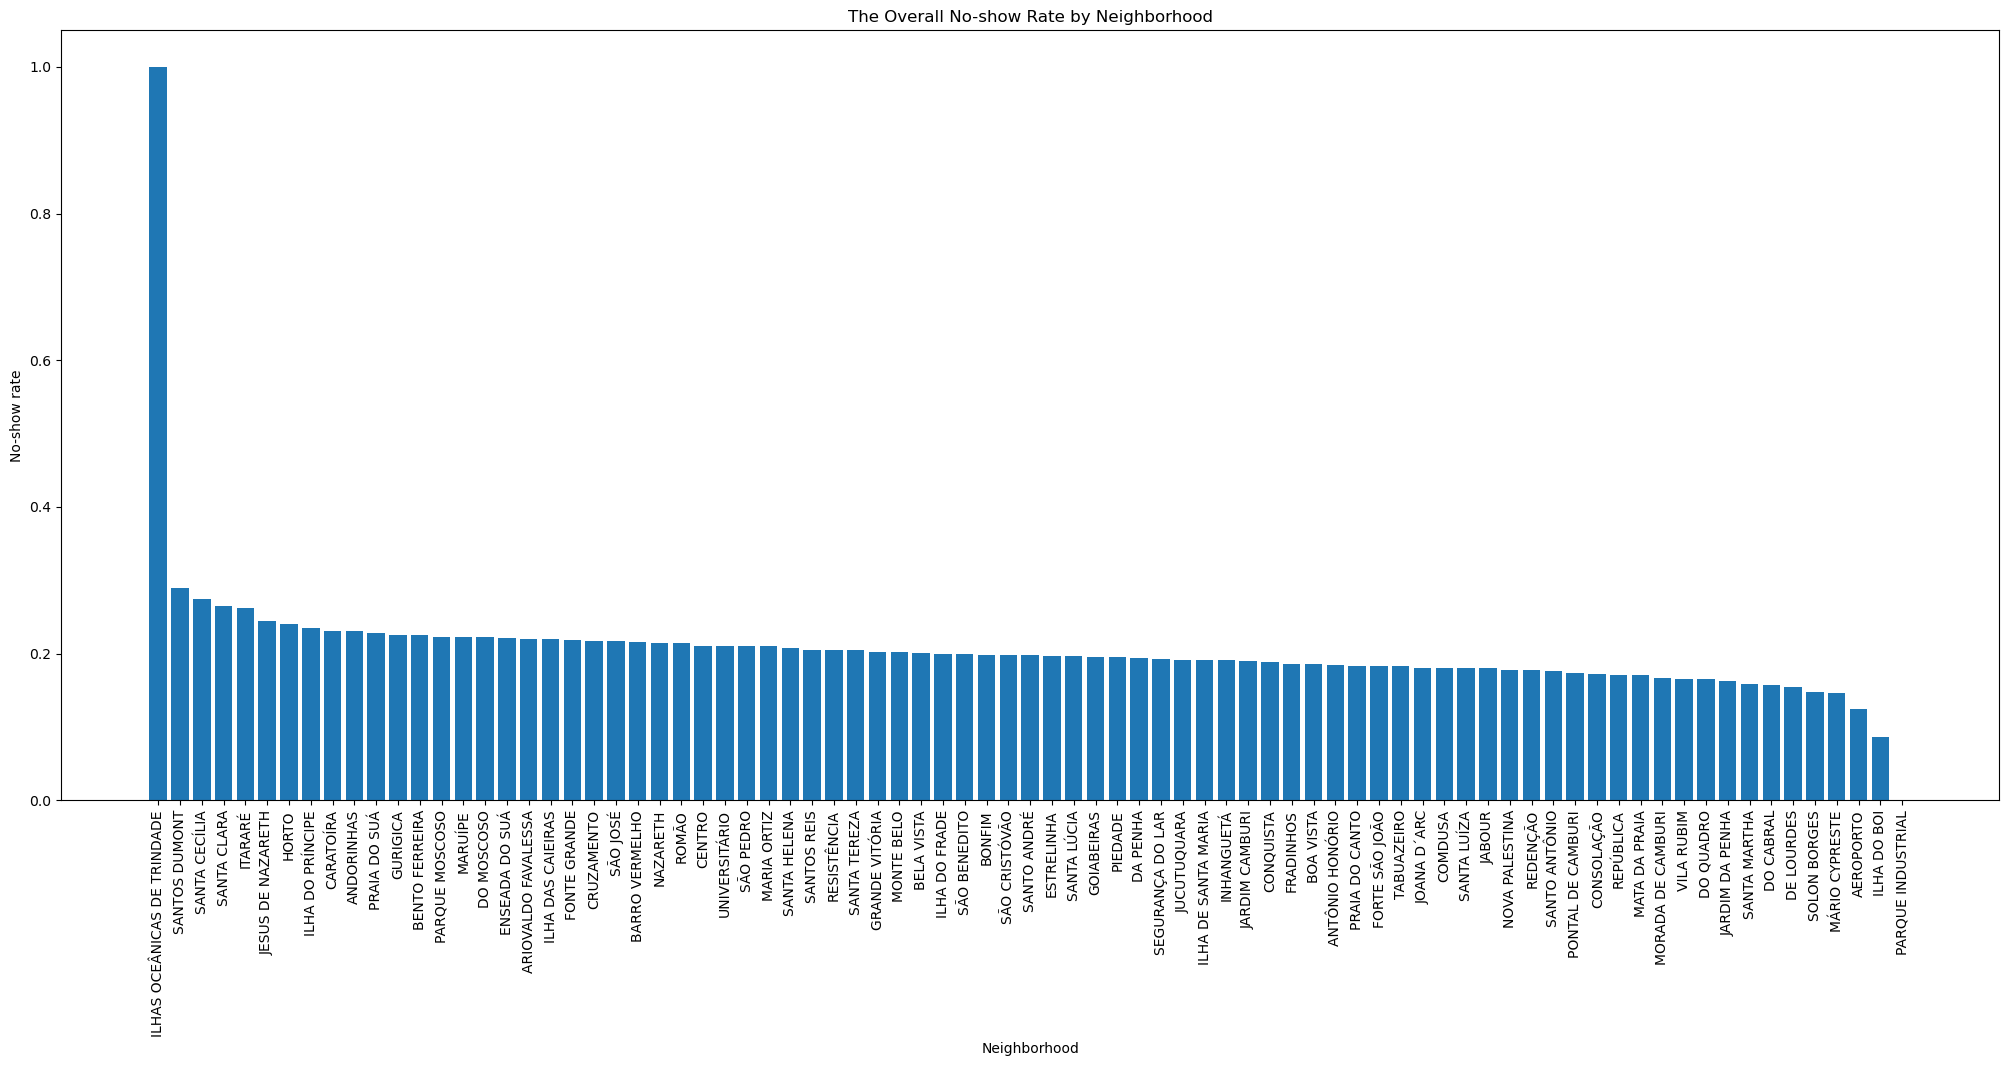

In [38]:
plt.bar(neighborhood_no_show_rate.index, neighborhood_no_show_rate.values)
plt.xticks(rotation=90)
plot_bar_chart('Neighborhood','No-show rate','The Overall No-show Rate by Neighborhood',25,10)

The neighborhood of "ILHAS OCEÂNICAS DE TRINDADE" has the average of no-show rate is 1, meaning that patients that book appointment to visit doctors in this neighborhood are more like to miss the appointment.

### Q5. Is there a relationship between wait times and appointment attendance?

Calculate appointment attendance rate

In [39]:
attendance_rate = 1 - df['noshow'].mean()

print(attendance_rate)

0.7980656135208005


Calculate wait times

In [40]:
df['waittime'] = (df['appointmentday'] - df['scheduledday']).dt.days

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agegroup,waittime
0,29872499824296,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,51-65,0
1,558997776694438,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,51-65,0
2,4262962299951,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,51-65,0
3,867951213174,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0-18,0
4,8841186448183,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,51-65,0


Plot appointment attendance rate

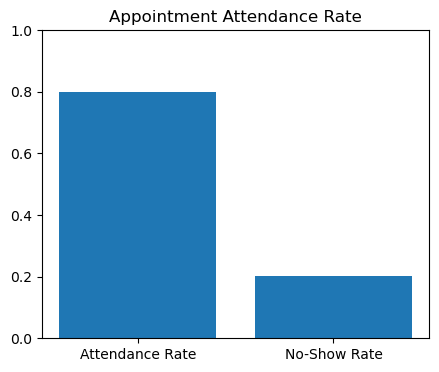

In [41]:
plt.figure(figsize=(5,4))
plt.bar(['Attendance Rate', 'No-Show Rate'], [attendance_rate, 1 - attendance_rate])
plt.ylim([0, 1])
plt.title('Appointment Attendance Rate')
plt.show()

In this case, the attendance rate is approximately 0.798, meaning that 79.8% of all appointments were attended, while the no-show rate is approximately 0.202, or 20.2% of all appointments were missed.

Plot wait times

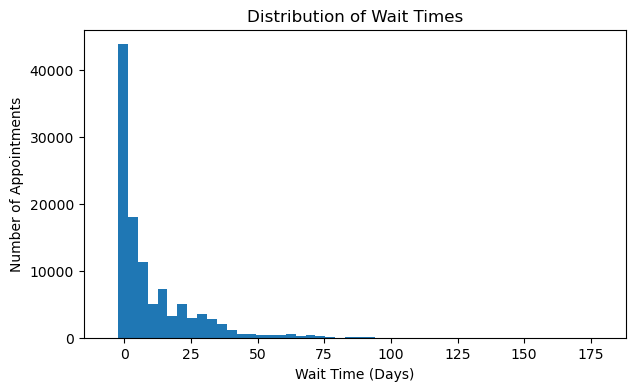

In [42]:
plt.hist(df['waittime'], bins=50)
plot_bar_chart('Wait Time (Days)','Number of Appointments','Distribution of Wait Times',7,4)

In [43]:
df['waittime'].value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
82         1
127        1
126        1
151        1
123        1
Name: waittime, Length: 131, dtype: int64

Calculate the average wait time for appointments where the patient attended and where they did not attend

In [44]:
attended_mean_wait_time = df[df['noshow'] == 0]['waittime'].mean()
missed_mean_wait_time = df[df['noshow'] == 1]['waittime'].mean()

print("Average wait time for attended appointments: ", round(attended_mean_wait_time, 2), " days")
print("Average wait time for missed appointments: ", round(missed_mean_wait_time, 2), " days")

Average wait time for attended appointments:  8.75  days
Average wait time for missed appointments:  15.83  days


Create a box plot to visualize the relationship between wait time and appointment attendance

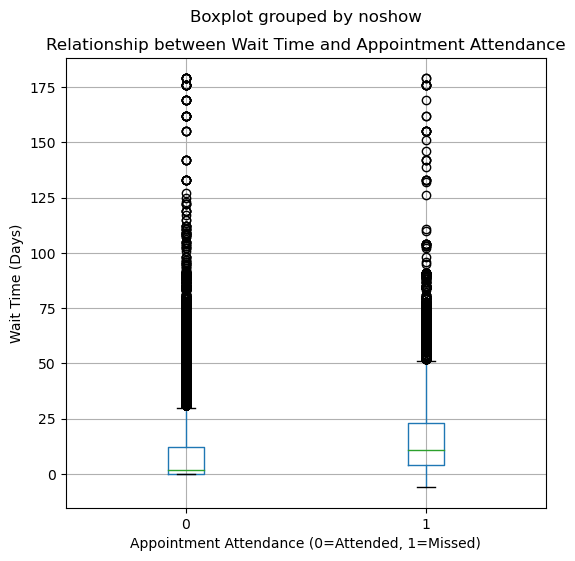

In [45]:
df.boxplot(column='waittime', by='noshow')
plot_bar_chart('Appointment Attendance (0=Attended, 1=Missed)','Wait Time (Days)','Relationship between Wait Time and Appointment Attendance',6,6)

The box plot shows that the median wait time for attended appointments is around 9 days, while the median wait time for missed appointments is around 16 days. Additionally, the box for attended appointments is shorter and contains fewer outliers, indicating that the wait times for attended appointments are generally more consistent than for missed appointments.

This suggests that there is a relationship between wait times and appointment attendance, with longer wait times potentially leading to more missed appointments. However, it's important to note that this is just a correlation and not necessarily a causal relationship. Other factors not considered in this analysis could also be influencing appointment attendance.

The attendance rate of the dataset is also calculated to be approximately 80%, meaning that 20% of the appointments were missed. This provides additional context for the box plot, as it shows that missed appointments are not a rare occurrence and may have significant implications for the healthcare system and patient outcomes.

<a id='conclusions'></a>
## Conclusions and Suggestions

#### Q1. What is the overall no-show rate for medical appointments in Brazil, and how does it vary by different patient characteristics such as gender, age, and enrollment in welfare program?

##### Gender
In this dataset, it can be concluded that the overall no-show rate for appointments is approximately 20%, and there is a slight difference between male and female no-show rates. Female patients have a slightly higher no-show rate of 20.3%, while male patients have a slightly lower no-show rate of 19.9%. It is also important to note that the number of female patients takes place in this survey is 71839, while male is 38687.

*Suggestions:* Further analysis, such as statistical tests or modeling, would be required to determine whether there is a significant difference between male and female no-show rates and whether gender is a significant predictor of no-show behavior. It may also be helpful to investigate other factors that could be influencing no-show rates, such as age, socioeconomic status, or appointment type.

##### Age group
Based on the given information, it can be concluded that there is a relationship between age and no-show rates for appointments. The no-show rates for the "0-18" and "19-35" age groups are higher than the overall no-show rate, while the no-show rates for the "36-50", "51-65", and "65+" age groups are lower than the overall no-show rate.

*Suggestions:* Further analysis is needed to determine the significance of this relationship and to explore potential causal factors. For example, it may be useful to investigate whether younger patients are more likely to miss appointments due to scheduling conflicts or lack of transportation, or whether older patients are more likely to prioritize their healthcare needs and attend appointments even if they are feeling well.

##### Welfare enrolled
It can be concluded that there is a relationship between enrollment in the Bolsa Família program and no-show rates for appointments. Patients who are enrolled in the program have a higher no-show rate than the overall population, while patients who are not enrolled in the program have a lower no-show rate than the overall population.

*Suggestions:* Medical providers and policymakers could use this information to target interventions to improve attendance for patients who are enrolled in the Bolsa Família program. For example, they may consider providing reminders via text message or phone calls, offering transportation assistance, or improving access to healthcare services in areas where Bolsa Família enrollment is high. Additionally, further research could be conducted to investigate potential causal factors for this relationship, such as transportation barriers, competing demands on patients' time, or communication barriers.


#### Q2. What is the relationship between receiving SMS reminders and the likelihood of showing up for a medical appointment?

It can be concluded that there is a relationship between SMS reminders and no-show rates for appointments. Patients who did not receive an SMS reminder have a lower no-show rate than the overall population, while patients who did receive an SMS reminder have a higher no-show rate than the overall population.

*Suggestions:* It may be useful to investigate whether patients who receive SMS reminders are more likely to be non-compliant with medical advice or have other competing demands on their time that make it difficult for them to attend appointments. Additionally, medical providers may need to consider alternative strategies for improving attendance, such as offering personalized scheduling or appointment reminders via phone calls or email.

#### Q3. How do different health conditions such as hypertension, diabetes, and alcoholism affect the likelihood of showing up for a medical appointment?

Based on the given information, there is a relationship between certain medical conditions and no-show rates for appointments. Patients with hypertension are more likely to show up for their appointments compared to patients with alcoholism. Additionally, having any of the listed conditions may increase the likelihood of missing an appointment.

*Suggestions:* Medical providers may use this information to better understand the factors that influence patient attendance and to develop strategies to improve attendance for patients with these conditions. For example, providers may consider offering personalized appointment reminders, addressing any transportation barriers or financial concerns, or offering resources for managing these conditions, such as support groups or educational materials. Additionally, providers may need to consider the potential impacts of these conditions on patients' ability to attend appointments and make accommodations as necessary.


#### Q4. Are there any particular neighborhoods or regions in Brazil that have a higher or lower rate of no-shows for medical appointments? 

The neighborhood of "ILHAS OCEÂNICAS DE TRINDADE" has a higher no-show rate compared to the overall population. This means that patients who book appointments to visit doctors in this neighborhood are more likely to miss their appointments.

*Suggestions:* Providers may consider offering more flexible scheduling options, personalized appointment reminders, or addressing any transportation or financial barriers that may be preventing patients from attending appointments. Additionally, policymakers may need to consider the social determinants of health that may be contributing to no-show rates in certain neighborhoods, such as poverty, lack of access to transportation, or social isolation.

#### Q5. Is there a relationship between wait times and appointment attendance?

It can be concluded that there is a relationship between wait times and appointment attendance, with longer wait times potentially leading to more missed appointments. This is supported by the box plot, which shows that the median wait time for missed appointments is longer than for attended appointments, and the attendance rate of the dataset, which shows that 20% of appointments were missed.

*Suggestions:* Providers may consider implementing scheduling systems that prioritize patients with urgent medical needs, reducing the time between appointment scheduling and the actual appointment, or offering more flexible scheduling options. Additionally, providers may consider implementing appointment reminder systems to help reduce missed appointments.


<a id='limits'></a>
## Limitations

While this dataset provides some insights into the factors that may contribute to missed appointments, it has some limitations. For example:

* The dataset does not include information about the severity of the patient's health condition or the reason for the appointment, which could be important factors in predicting appointment attendance.
* The dataset does not include information about the patient's socioeconomic status, which could be an important factor in predicting appointment attendance.

To better answer the question of why people are missing their doctor appointments, it would be useful to collect additional variables, such as:

* Reason for appointment (e.g., routine check-up, specialist consultation, follow-up care)
* Severity of health condition (e.g., acute illness, chronic disease)
* Socioeconomic status (e.g., income level, education level)
* Mode of transportation to the appointment (e.g., car, public transportation, walking)
* Distance to the appointment location (e.g., in kilometers)
* Waiting time at the appointment location (e.g., time spent in the waiting room)

Collecting these additional variables could provide a more comprehensive understanding of the factors that contribute to missed appointments and help healthcare providers and policymakers develop targeted interventions to improve appointment attendance.